In [2]:
import numpy as np
import celmech as cm
from matplotlib import pyplot as plt
import sympy as sp

In [3]:
u,v = sp.symbols("u,v",real=True)
pu,pv = sp.symbols("p_u,p_v",real=True)
e,L = sp.symbols("e,L",positive=True)
coshu = sp.cosh(u)
cosv = sp.cos(v)
sinhu = sp.sinh(u)
sinv = sp.sin(v)
U = coshu * sp.atan(e*coshu/sp.sqrt(1-e*e))/e
V = cosv * sp.atan(e*cosv/sp.sqrt(1-e*e))/e
Phi = -(U-V)/(sinv*sinv + sinhu*sinhu)
T = (pu*pu + pv*pv)/2/e/e/(sinv*sinv + sinhu*sinhu) + L*L/2/e/e/sinhu**2/sinv**2
H = T + Phi

In [8]:
I3 = sinv*sinv*(pu*pu/e/e/2 + L*L/e/e/2/sinhu/sinhu + U)
I3-= sinhu*sinhu*(pv*pv/e/e/2 + L*L/e/e/2/sinv/sinv - V)
I3 /=(sinv*sinv + sinhu*sinhu)
I3

  ⎛                          ⎛  e⋅cos(v) ⎞       ⎞            ⎛                            ⎛ e⋅cosh(u) ⎞       ⎞        
  ⎜               cos(v)⋅atan⎜───────────⎟       ⎟            ⎜                cosh(u)⋅atan⎜───────────⎟       ⎟        
  ⎜                          ⎜   ________⎟       ⎟            ⎜                            ⎜   ________⎟       ⎟        
  ⎜      2                   ⎜  ╱      2 ⎟     2 ⎟            ⎜       2                    ⎜  ╱      2 ⎟     2 ⎟        
  ⎜     L                    ⎝╲╱  1 - e  ⎠   pᵥ  ⎟     2      ⎜      L                     ⎝╲╱  1 - e  ⎠   pᵤ  ⎟    2   
- ⎜──────────── - ──────────────────────── + ────⎟⋅sinh (u) + ⎜───────────── + ───────────────────────── + ────⎟⋅sin (v)
  ⎜   2    2                 e                  2⎟            ⎜   2     2                  e                  2⎟        
  ⎝2⋅e ⋅sin (v)                              2⋅e ⎠            ⎝2⋅e ⋅sinh (u)                               2⋅e ⎠        
────────────────────────────────

In [10]:
state=cm.PhaseSpaceState([u,v,pu,pv],[1,0.5*np.pi-0.2,0,0])
ham = cm.Hamiltonian(H,{e:0.5,L:0.2},state)


In [22]:
ham.H_params

{e: 0.5, L: 0.2}

In [40]:
pu_dot = ham.flow.xreplace({v:sp.pi/2,pv:0,pu:0})[2]
sp.simplify(pu_dot)
Lsoln=sp.solve(pu_dot,L)[1]

In [41]:
fn = sp.lambdify((u,e),Lsoln)

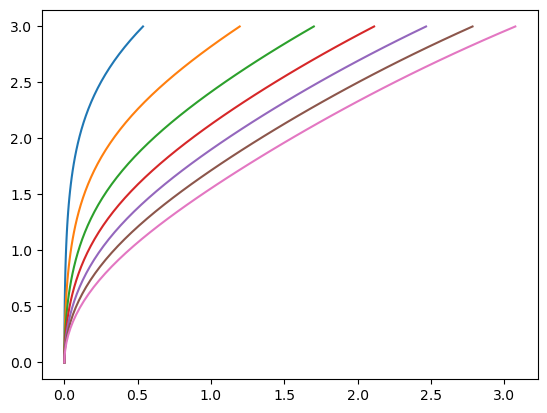

In [43]:
for ecc in np.linspace(0.1,0.7,7):
    plt.plot(fn(np.linspace(0,3),ecc),np.linspace(0,3))

In [17]:
E = sp.symbols("E",positive=True)
_ = sp.simplify((ham.H-E)*(sinv*sinv+sinhu*sinhu))
exprn=sp.expand(_)
exprnU=exprn.func(*[a for a in exprn.args if (u in a.free_symbols or pu in a.free_symbols)])
exprnV=exprn.func(*[a for a in exprn.args if (v in a.free_symbols or pv in a.free_symbols)])

I3=sp.symbols("I3",real=True)

I3eqn = exprnV.xreplace({E:sp.solve(-1*exprnU-I3,E)[0]})

I3exprn = sp.solve(I3eqn-I3,I3)[0]
I3exprn

   2    2       2     2                                                                                                        
  L ⋅sin (v)   L ⋅sinh (u)          2                ⎛ e⋅cosh(u) ⎞                  2        ⎛  e⋅cos(v) ⎞     2    2        2 
- ────────── + ─────────── + 2⋅e⋅sin (v)⋅cosh(u)⋅atan⎜───────────⎟ + 2⋅e⋅cos(v)⋅sinh (u)⋅atan⎜───────────⎟ - pᵤ ⋅sin (v) + pᵥ ⋅
       2            2                                ⎜   ________⎟                           ⎜   ________⎟                     
   sinh (u)      sin (v)                             ⎜  ╱      2 ⎟                           ⎜  ╱      2 ⎟                     
                                                     ⎝╲╱  1 - e  ⎠                           ⎝╲╱  1 - e  ⎠                     
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                          2 ⎛   2          2   ⎞                        

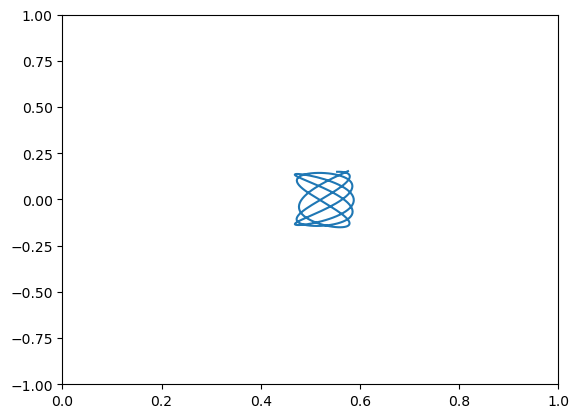

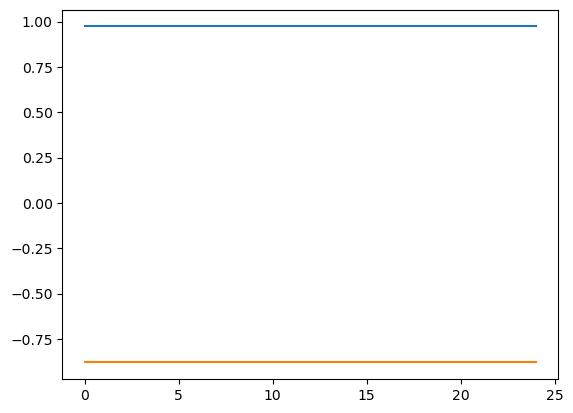

In [21]:
I3fn = sp.lambdify(ham.qp_vars,I3exprn.xreplace(ham.H_params))
Nout = 256
state_soln = np.zeros((Nout,4))
times = np.linspace(0,24,Nout)

for i,t in enumerate(times):
    ham.integrate(t)
    state_soln[i] = ham.state.values
Rarr = 0.5 * np.sinh(state_soln[:,0]) * np.sin(state_soln[:,1])
zarr = 0.5 * np.cosh(state_soln[:,0]) * np.cos(state_soln[:,1])
plt.plot(Rarr,zarr)
plt.xlim(0,1)
plt.ylim(-1,1)
plt.figure()
plt.plot(times,I3fn(*state_soln.T))
plt.plot(times,ham.H_func(*state_soln.T))


In [49]:
V

           ⎛  e⋅cos(v) ⎞
cos(v)⋅atan⎜───────────⎟
           ⎜   ________⎟
           ⎜  ╱      2 ⎟
           ⎝╲╱  1 - e  ⎠
────────────────────────
           e            